
# Programming for Data Analytics Big Project 

This project is a look into the weather data of Shannon Airport collected on data.gov.ie:
- https://data.gov.ie/dataset/shannon-airport-monthly-data


## Python Library Imports



In [1]:
# All relevant python libraries (1) (2) (3)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Loadin the Data

Load the Met Éireann dataset file:
- weather_shannon_airport.csv



In [2]:
# Reading in the csv file (5) 
# Bypassing problematic lines without raising errors (6)
df = pd.read_csv('weather_shannon_airport.csv', on_bad_lines='skip', skiprows=19)

## Dataset Columns:

- year:  -  Year
- month: -  Month
- rain:  -  Precipitation Amount (mm)
- meant: -  Mean Air Temperature (C)
- maxtp: -  Maximum Air Temperature (C)	  
- mintp: -  Minimum  Air Temperature (C)	
- mnmax: -  Mean Maximum Temperature (C)
- mnmin: -  Mean Minimum Temperature (C)
- gmin:  -  Grass Minimum Temperature (C)
- wdsp:  -  Mean Wind Speed (knot)
- mxgt:  -  Highest Gust (knot)
- sun:   -  Sunshine duration (hours)
- ind:   -  Indicator

# Inspect the Data

In [3]:
# Examing the first five column rows (7.1)
df.head()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1945,9,15.0,23.3,5.4,18.4,11.6,61.8,0.9,10.5,56,109.5
1,1945,10,12.4,18.8,4.3,15.9,8.9,94.3,1.6,10.6,54,104.7
2,1945,11,8.2,15.5,-3.6,11.5,5.0,42.7,-6.0,8.4,36,56.7
3,1945,12,7.4,13.2,-0.9,10.2,4.7,120.2,-4.0,10.5,47,43.2
4,1946,1,5.7,11.6,-5.2,8.6,2.8,103.8,-8.9,12.8,64,59.2


In [4]:
# Summarising the Dataset's structure and looking at Dtypes of columns (7.2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    951 non-null    int64  
 1   month   951 non-null    int64  
 2   meant   951 non-null    float64
 3   maxtp   951 non-null    float64
 4   mintp   951 non-null    float64
 5   mnmax   951 non-null    float64
 6   mnmin   951 non-null    float64
 7   rain    951 non-null    float64
 8   gmin    951 non-null    float64
 9   wdsp    951 non-null    float64
 10  maxgt   951 non-null    int64  
 11  sun     951 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 89.3 KB


The dataset contains 12 rows of 951 entries total, all being either intergers or floats.

In [5]:
# Checking for null values (7.5)
df.isnull().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

No null values detected.

In [6]:
# Descibing the whole dataset (7.3)
df.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,1984.790747,6.511041,10.411672,18.490326,1.305889,13.840904,6.982440,80.816719,-2.575079,9.614826,47.261830,110.464774
std,22.890986,3.454308,3.874777,4.872731,4.587845,4.198533,3.643217,40.849099,4.707855,1.917779,10.360644,52.737168
min,1945.000000,1.000000,-0.400000,5.700000,-11.400000,2.700000,-3.600000,0.800000,-15.000000,4.700000,23.000000,19.500000
25%,1965.000000,4.000000,7.200000,14.000000,-2.000000,10.100000,4.100000,51.750000,-6.100000,8.200000,40.000000,64.800000
50%,1985.000000,7.000000,10.000000,18.100000,0.800000,13.700000,6.500000,74.800000,-2.900000,9.400000,46.000000,104.700000
75%,2005.000000,10.000000,14.000000,22.400000,5.150000,17.700000,10.300000,104.250000,1.300000,10.800000,53.000000,147.750000
max,2024.000000,12.000000,19.300000,32.000000,11.700000,24.200000,14.500000,263.200000,7.900000,21.700000,93.000000,261.200000


In [7]:
# Describing the Mean Air Temperature (°C) and Mean Wind Speed (knot) columns (7.3)
describe = df[['meant', 'wdsp']].describe()
print(describe)

            meant        wdsp
count  951.000000  951.000000
mean    10.411672    9.614826
std      3.874777    1.917779
min     -0.400000    4.700000
25%      7.200000    8.200000
50%     10.000000    9.400000
75%     14.000000   10.800000
max     19.300000   21.700000


In [8]:
# Dropping unnecessry columns for my comparison (7.4)
df_clean = df.drop(columns=['year', 'month'])


In [9]:
# Finding a correlation using the pearson method (8)
correlation = df_clean.corr(method='pearson')
print(correlation)

          meant     maxtp     mintp     mnmax     mnmin      rain      gmin  \
meant  1.000000  0.928439  0.931953  0.990179  0.986751 -0.148571  0.901956   
maxtp  0.928439  1.000000  0.827580  0.950777  0.879536 -0.255577  0.800965   
mintp  0.931953  0.827580  1.000000  0.905145  0.940033 -0.059808  0.939344   
mnmax  0.990179  0.950777  0.905145  1.000000  0.954543 -0.209164  0.876021   
mnmin  0.986751  0.879536  0.940033  0.954543  1.000000 -0.075444  0.909871   
rain  -0.148571 -0.255577 -0.059808 -0.209164 -0.075444  1.000000 -0.038219   
gmin   0.901956  0.800965  0.939344  0.876021  0.909871 -0.038219  1.000000   
wdsp  -0.316324 -0.383503 -0.277774 -0.349305 -0.270503  0.437047 -0.230008   
maxgt -0.504705 -0.527402 -0.460094 -0.522571 -0.471687  0.447957 -0.418388   
sun    0.594214  0.715250  0.488803  0.683822  0.476138 -0.403714  0.466646   

           wdsp     maxgt       sun  
meant -0.316324 -0.504705  0.594214  
maxtp -0.383503 -0.527402  0.715250  
mintp -0.277774 

In [10]:
# Accessesing the rows and columns by labels to produce a correlation (7.6)
temp_wind_correlation = correlation.loc['meant', 'wdsp']
print("Correlation between Temperature and Windspeed:", temp_wind_correlation)

Correlation between Temperature and Windspeed: -0.31632427620969344


Here we can see the value for the correlation shows a slight inverse relationship between temperature and wind speed but it is very weak.

## Visualising the Data

Here we will look at the data for both the mean temperature and the mean wind speed:  Years & Months

### Mean Temperature

In [11]:
# Converting the 'year' & 'month' columns to datetime format (9)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

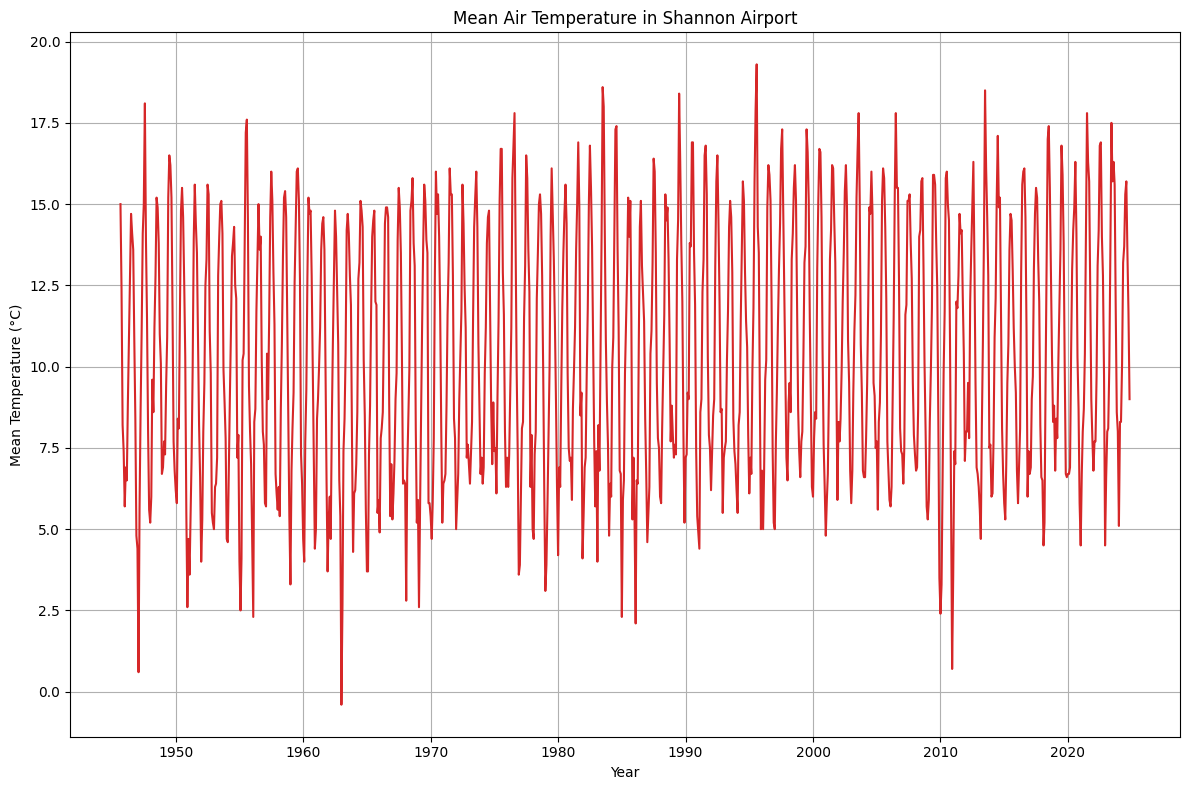

In [12]:
# Plotting the yearly mean temperatures (2.1)
plt.figure(figsize=(12, 8))

plt.plot(df['date'], df['meant'], label='Mean Temperature (°C)', color='tab:red')
plt.title('Mean Air Temperature in Shannon Airport')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

Data collected from 1945 - 2024:
- Min Temperature = - 0.4 (°C)
- Max Temperature = 19.3 (°C)
- Avg Mean Temperature = 10.41 (°C)

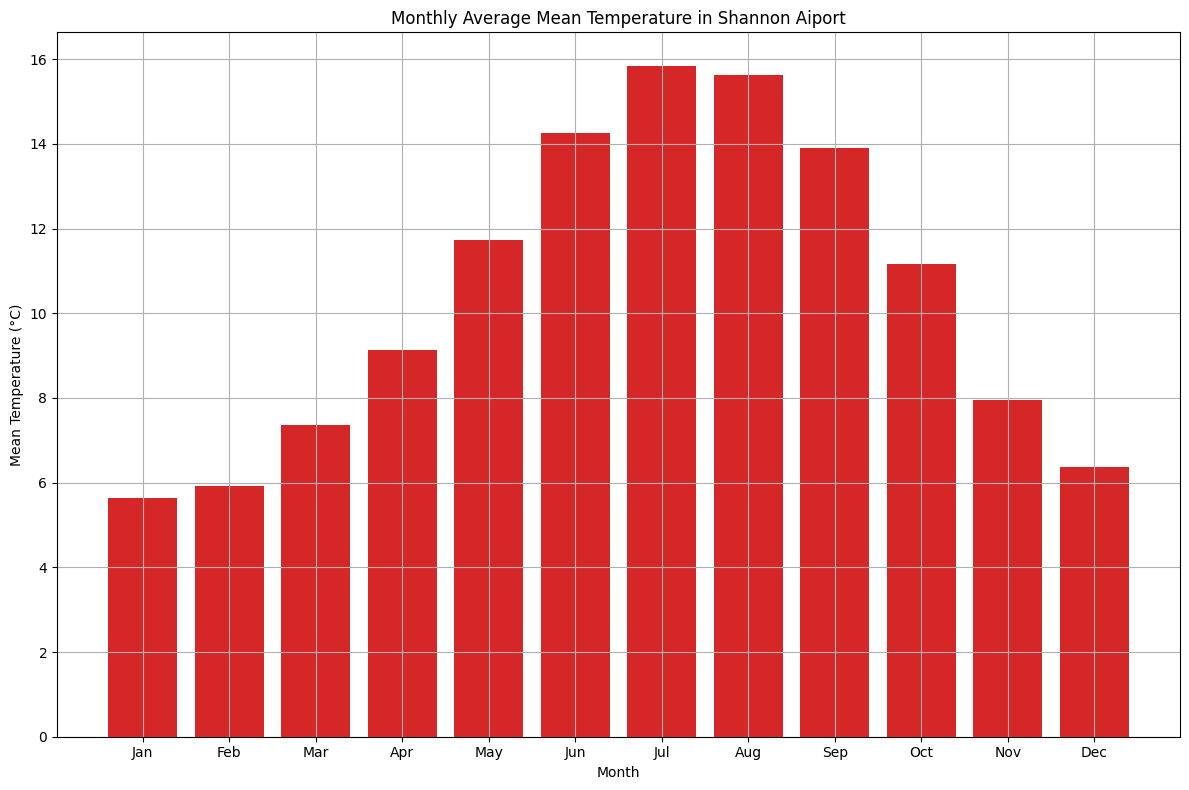

In [13]:
# Plotting the monthly mean temperature on a bar chart (2.2) (7.7.1)
monthly_avg = df.groupby('month')[['meant']].mean()

# Plot Monthly Mean Temperature.
plt.figure(figsize=(12, 8))
plt.bar(monthly_avg.index, monthly_avg['meant'], color='tab:red')
plt.title('Monthly Average Mean Temperature in Shannon Aiport')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(monthly_avg.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.grid(True)

There appears to be a uniform change in the monthly mean temperatures over the years, where the coldest temperatures tend to be in January and the warmest being in July and August.

### Mean Wind Speeds

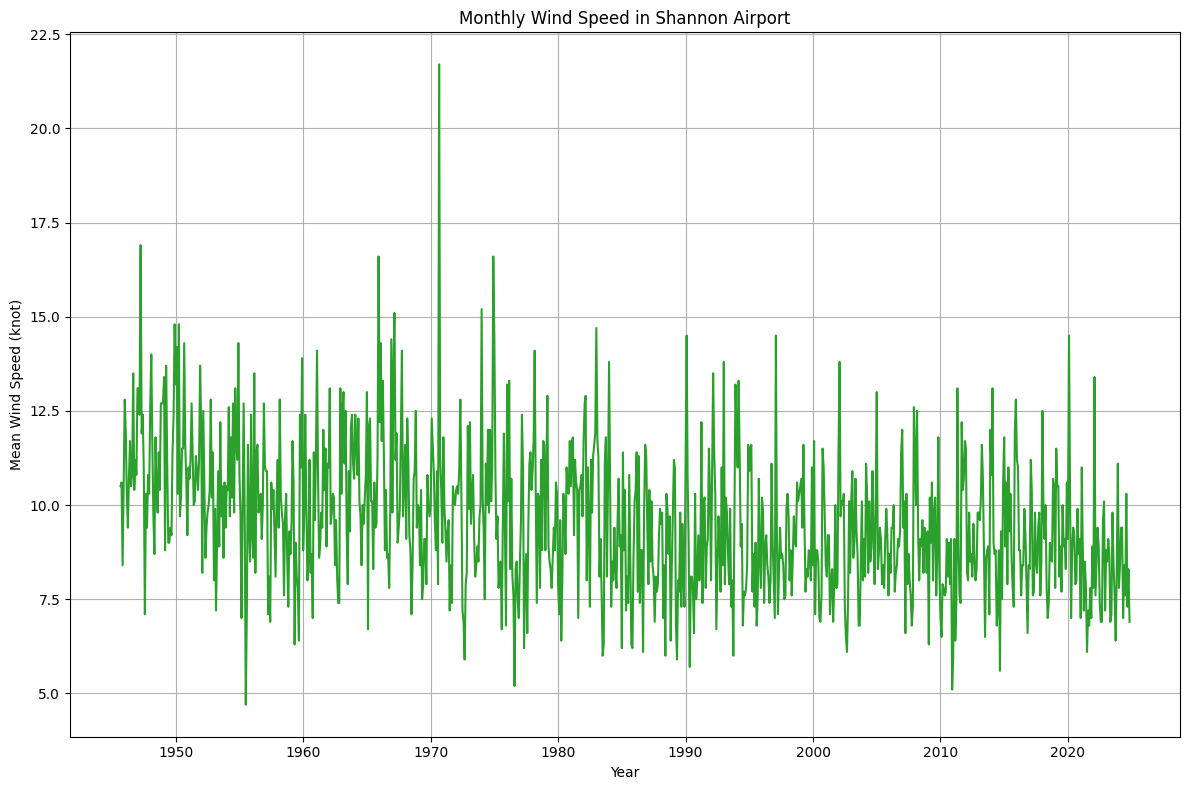

In [14]:
# Plotting the yearly mean wind speeds (2.1)
plt.figure(figsize=(12, 8))
plt.plot(df['date'], df['wdsp'], label='Mean Wind Speed (knot)', color='tab:green')
plt.title('Monthly Wind Speed in Shannon Airport')
plt.xlabel('Year')
plt.ylabel('Mean Wind Speed (knot)')
plt.grid(True)
plt.tight_layout()
plt.show()

Data displayed from 1945 - 2024:
- Min Wind Speed = 4.7 (knots)
- Max Wind Speed = 21.7 (knots)
- Avg Mean Wind Speed = 9.61 (knots)

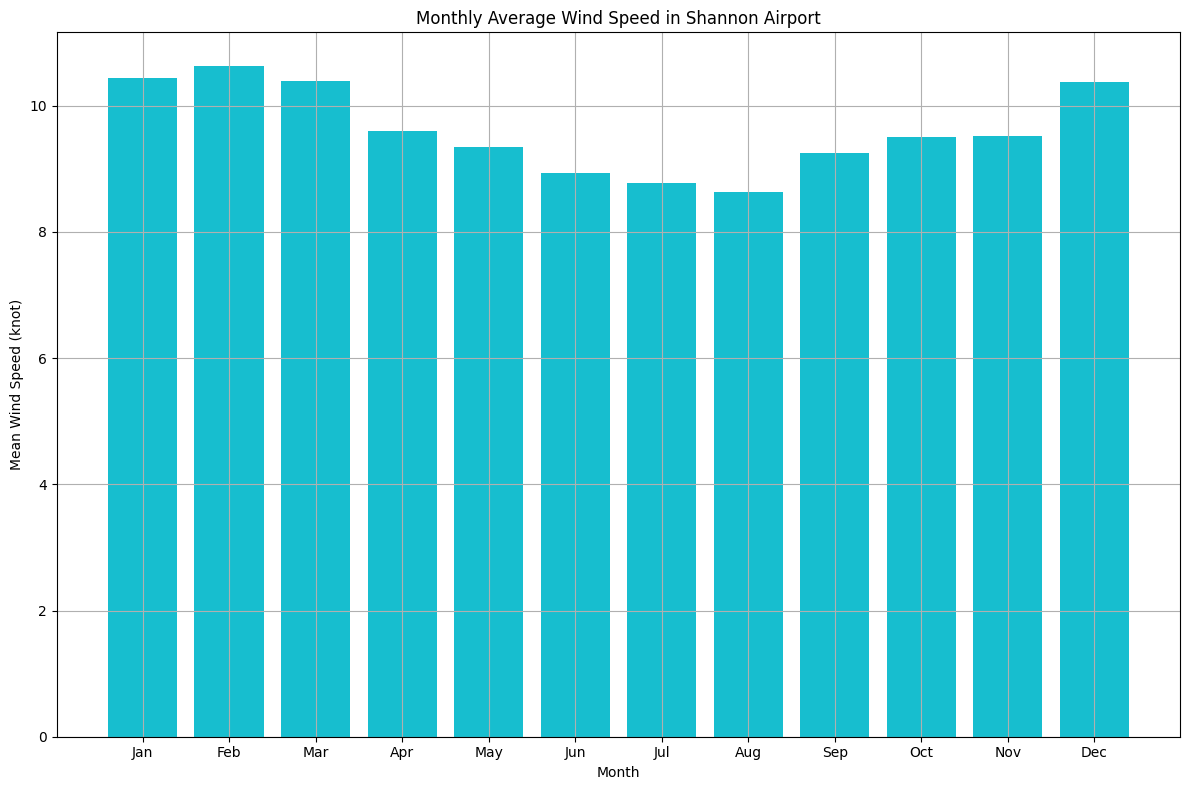

In [15]:
# Plotting the monthly mean wind speeds on a bar chart (2.2) (7.7.1)
monthly_avg = df.groupby('month')[['wdsp']].mean()

# Plot Monthly Mean Wind Speed.
plt.figure(figsize=(12, 8))
plt.bar(monthly_avg.index, monthly_avg['wdsp'], color='tab:cyan')
plt.title('Monthly Average Wind Speed in Shannon Airport')
plt.xlabel('Month')
plt.ylabel('Mean Wind Speed (knot)')
plt.xticks(monthly_avg.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

plt.tight_layout()
plt.show()

Despite the Max and Min values, over the years the average windspeed appears to be quite regular, only varying by roughly 2 knots.

### Heatmap Correlation

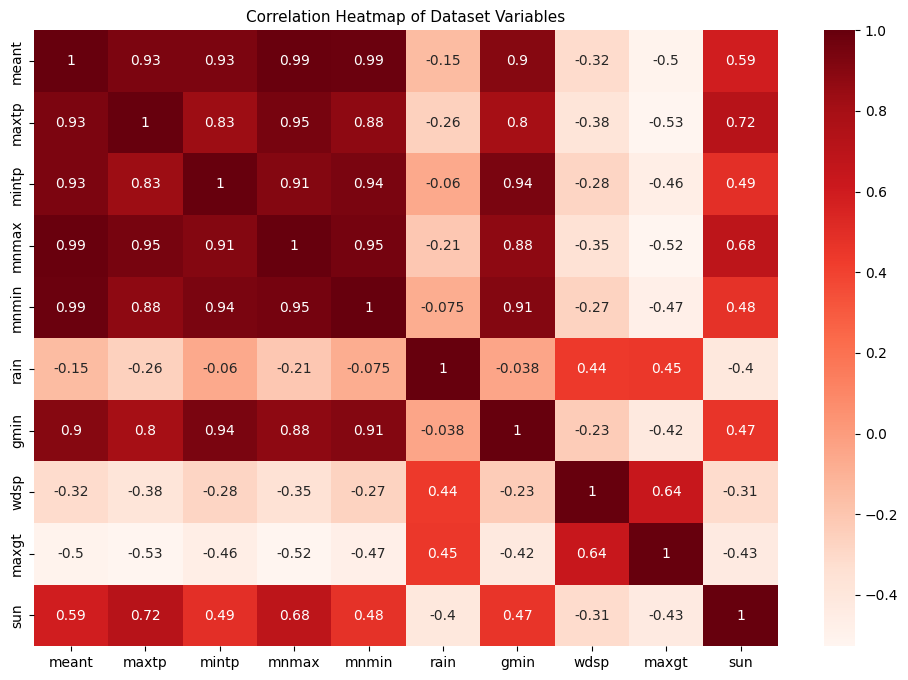

In [16]:
# Using a heatmap to visualise correlations for all columns (3.1)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='Reds')
plt.title('Correlation Heatmap of Dataset Variables', fontsize=11)
plt.show()

With a correlation of approximately -0.32, this shows a slight inverse relationship between temperature and wind speed, although this would be considereded a weak correlation. What can be drawn from this though is that other factors may influence both temperature and wind speed, given the weak correlation. This negative correlation can imply that changes in temperature do not cause changes in wind speed or vice versa.

# Conclusion


The weak inverse relationship from the variables looked at is not strong enough to make any significant predictions. Other variables could be influencing both temperature and wind speed. Factors such as geographical location, time of year , atmospheric pressure, or local weather systems could play a role in both temperature and wind speed.

This weak negative correlation reinforces the idea that weather patterns are complex and can be influenced by many more factors. Wind speed can be affected by things like storms, pressure systems, or geographical features, independent of temperature.

It may be necessary to conduct further analysis into otehr factors with the aim to provide insights into the true nature of the relationship between wind speed and temperature at the airport.

# Resources

(1) pandas - https://pandas.pydata.org/docs/index.html

(2) matplotlib -  https://matplotlib.org/2.0.2/users/pyplot_tutorial.html
 - (2.1) plt.plot() - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
 - (2.2) plt.bar() - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

(3) seaborn - https://seaborn.pydata.org/tutorial/introduction.html
 - (3.1) - sns.heatmap() - https://seaborn.pydata.org/generated/seaborn.heatmap.html

(4) .read.csv() - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

(5) Shannon Airport Monthly Data: https://data.gov.ie/dataset/shannon-airport-monthly-data

(6) on_bad_lines='skip' : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

(7) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html :
- (7.1) .head() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
- (7.2) .info() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
- (7.3) .describe() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
- (7.4) .drop() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
- (7.5) .dropna() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
- (7.5) .isnull() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html#pandas.DataFrame.isnull
- (7.6) .loc[] - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- (7.7) .groupby() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
- - (7.7.1) .groupby().mean() - https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html
 
(8) .corr() - https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

(9) .to_numeric() - https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

(10) .to_datetime('', format='%Y%m%d') - https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html




